In [1]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load your dataset into a Pandas DataFrame
data = pd.read_csv("final_loan_rate_vs_stock_values.csv")

# Ensure that your data is in the right format
data['Close (Rs.)'] = pd.to_numeric(data['Close (Rs.)'], errors='coerce')
data['Loan Rate'] = pd.to_numeric(data['Loan Rate'], errors='coerce')

# Set the maximum lag for the Granger causality test
max_lag = 4  # You can adjust this value based on your dataset and domain knowledge

# Perform Granger causality test
results = grangercausalitytests(data[['Close (Rs.)', 'Loan Rate']], max_lag, verbose=True)

# Analyze the results
for lag in range(1, max_lag + 1):
    print(f"Lag {lag}:")
    p_value = results[lag][0]['ssr_ftest'][1]
    if p_value < 0.05:
        print(f"Granger causality at lag {lag}: p-value = {p_value}")
    else:
        print(f"No Granger causality at lag {lag}: p-value = {p_value}")

/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=192.6398, p=0.0000  , df_denom=33792, df_num=1
ssr based chi2 test:   chi2=192.6569, p=0.0000  , df=1
likelihood ratio test: chi2=192.1098, p=0.0000  , df=1
parameter F test:         F=192.6398, p=0.0000  , df_denom=33792, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=98.1806 , p=0.0000  , df_denom=33789, df_num=2
ssr based chi2 test:   chi2=196.3902, p=0.0000  , df=2
likelihood ratio test: chi2=195.8217, p=0.0000  , df=2
parameter F test:         F=98.1806 , p=0.0000  , df_denom=33789, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=66.9340 , p=0.0000  , df_denom=33786, df_num=3
ssr based chi2 test:   chi2=200.8436, p=0.0000  , df=3
likelihood ratio test: chi2=200.2491, p=0.0000  , df=3
parameter F test:         F=66.9340 , p=0.0000  , df_denom=33786, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=50.5042 

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
data = pd.read_csv("final_loan_rate_vs_stock_values.csv")

# Ensure that your data is in the right format
data['Close (Rs.)'] = pd.to_numeric(data['Close (Rs.)'], errors='coerce')
data['Loan Rate'] = pd.to_numeric(data['Loan Rate'], errors='coerce')

# Create a new DataFrame with the relevant columns
df = data[['Close (Rs.)', 'Loan Rate']]

# Define the split point (e.g., 80% training, 20% testing)
split = int(0.8 * len(df))

# Split the data
train_data = df[:split]
test_data = df[split:]

# Fit the VAR model to the training data
model = VAR(train_data)
model_fitted = model.fit()

# Specify the number of steps ahead to forecast
n_forecast = len(test_data)

# Forecast future values
forecast = model_fitted.forecast(model_fitted.endog, steps=n_forecast)

# Create a DataFrame for the forecasted values
forecasted_data = pd.DataFrame(forecast, columns=df.columns)
forecasted_data.index = test_data.index

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close (Rs.)'], label='Actual Close (Rs.)', color='blue')
plt.plot(forecasted_data.index, forecasted_data['Close (Rs.)'], label='Forecasted Close (Rs.)', color='red')
plt.xlabel('Date')
plt.ylabel('Close (Rs.)')
plt.legend()
plt.title('VAR Forecast vs. Actual for Close (Rs.)')
plt.show()

In [3]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load your dataset
data = pd.read_csv("./final_loan_rate_vs_stock_values.csv")

# Select the relevant columns for factor analysis (assuming these columns contain numeric data)
selected_columns = ['Close (Rs.)', 'Loan Rate']

# Filter the dataset to include only the selected columns
data = data[selected_columns]

# Specify the number of factors
n_factors = 2

# Create a FactorAnalysis model
fa = FactorAnalysis(n_components=n_factors, random_state=0)

# Fit the model to your data
fa.fit(data)


# Print the factor loadings and explained variance
factor_loadings = pd.DataFrame(fa.components_, columns=selected_columns)

print("Factor Loadings:")
print(factor_loadings)


KeyboardInterrupt: 

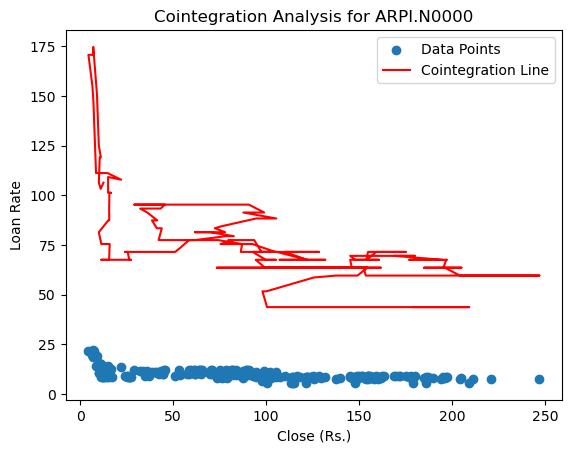

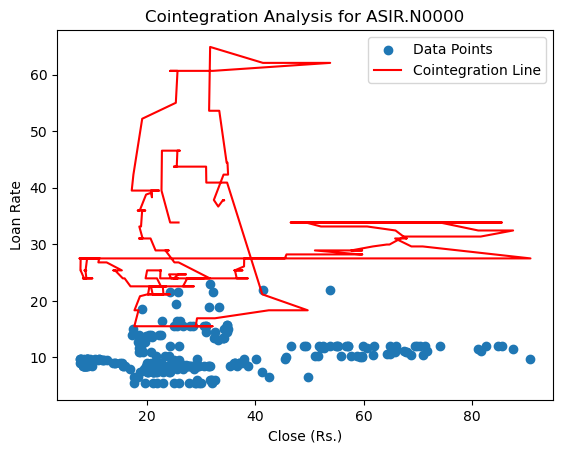

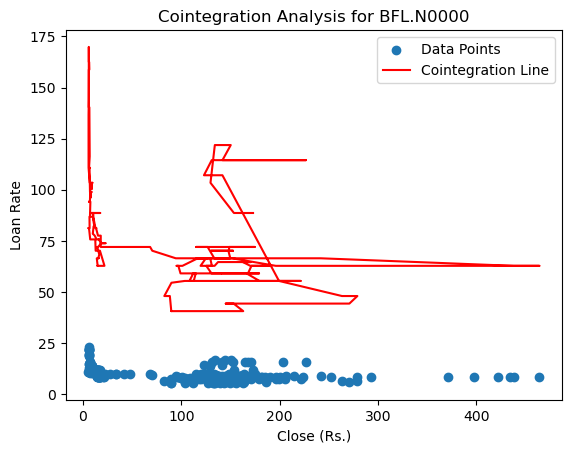

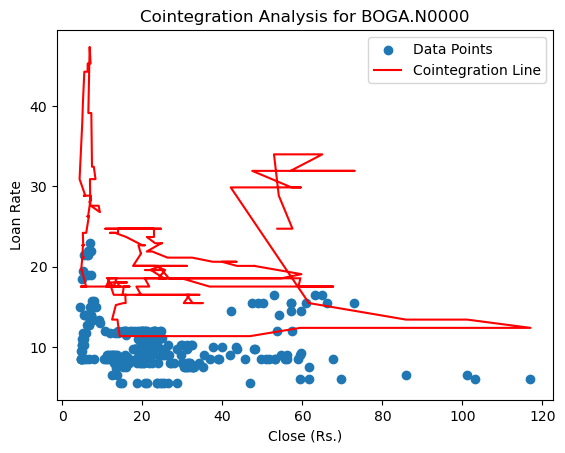

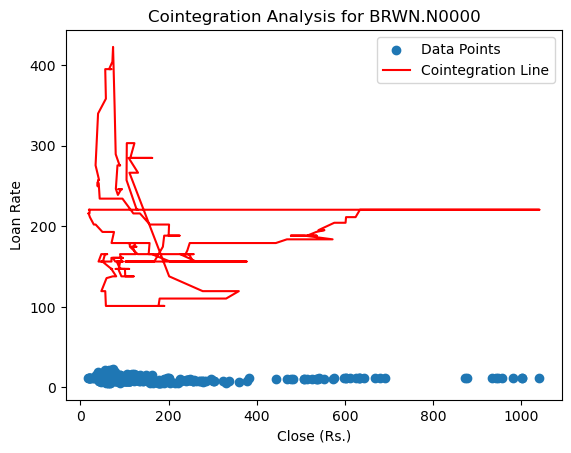

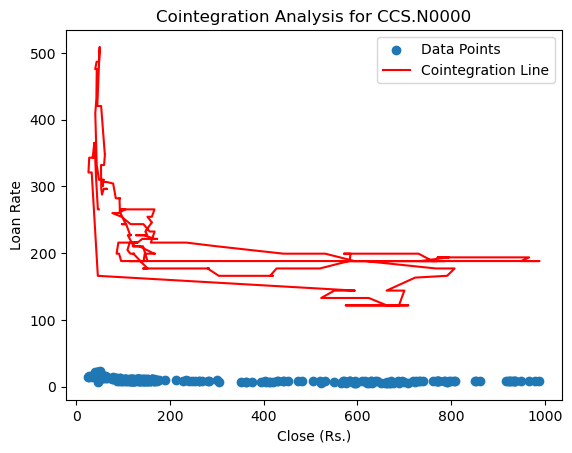

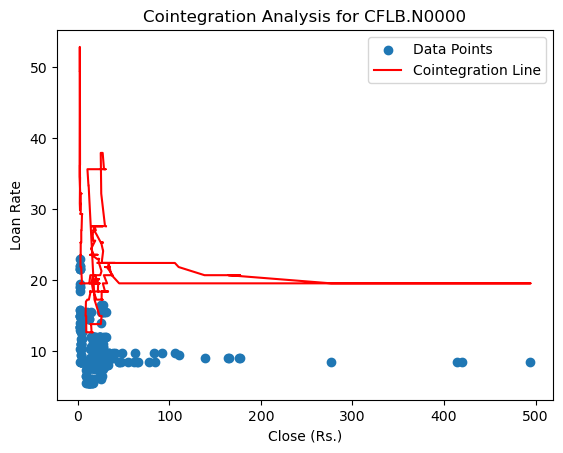

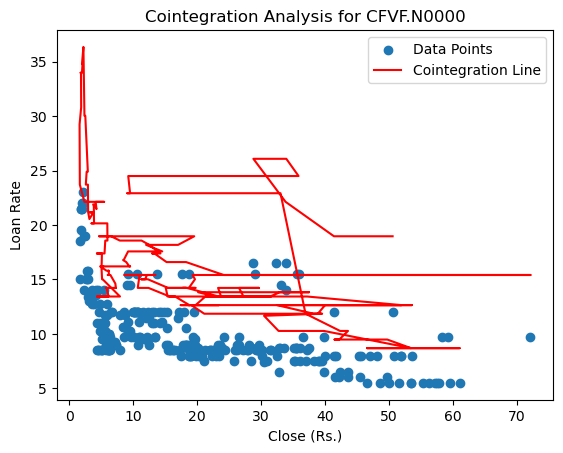

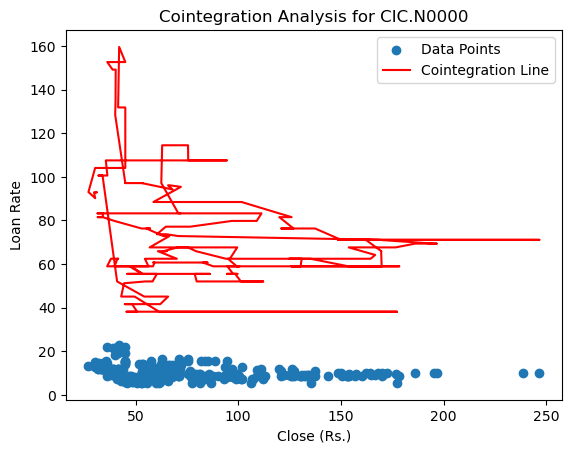

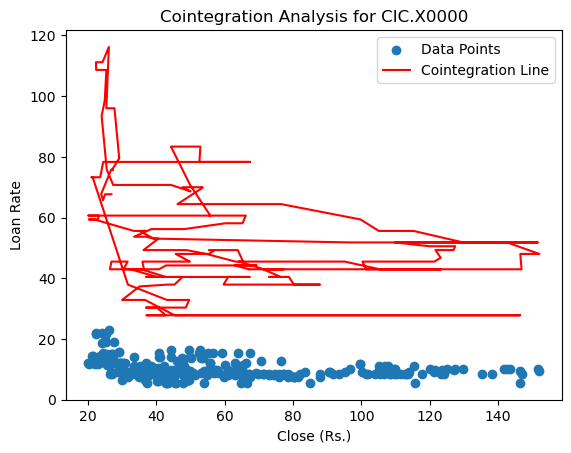

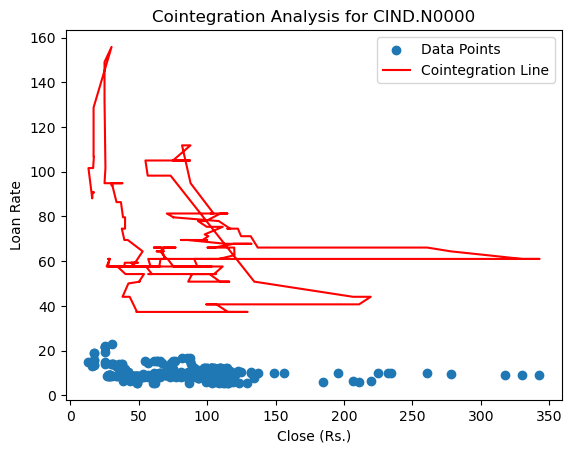

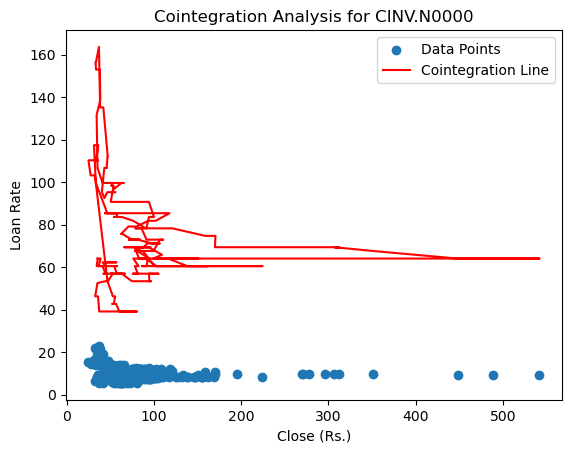

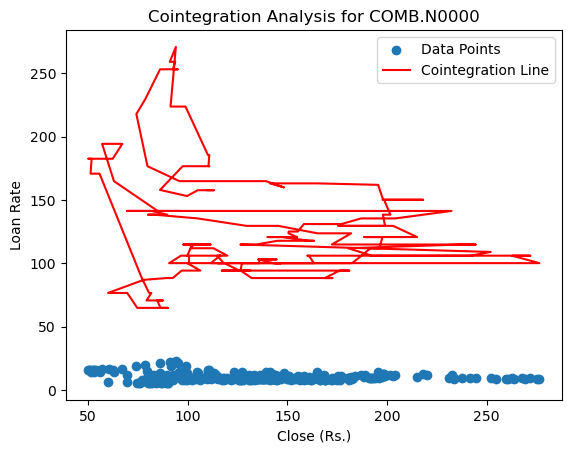

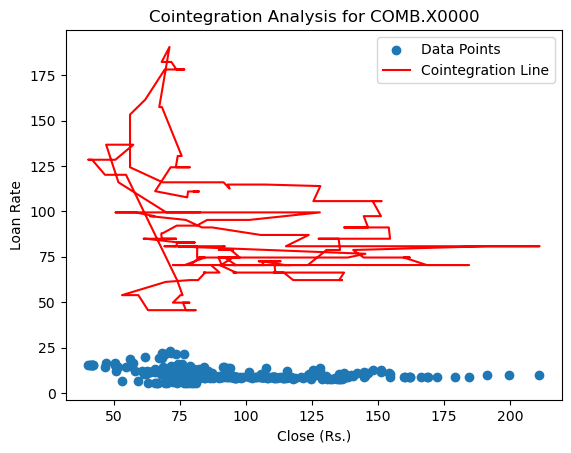

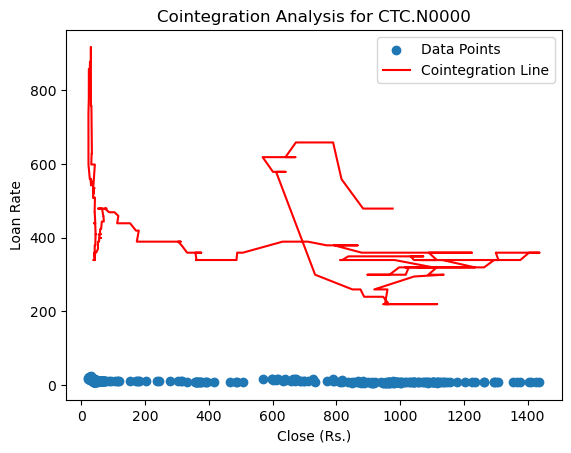

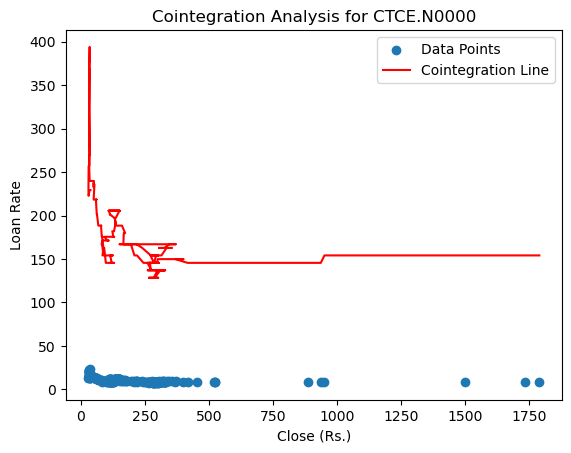

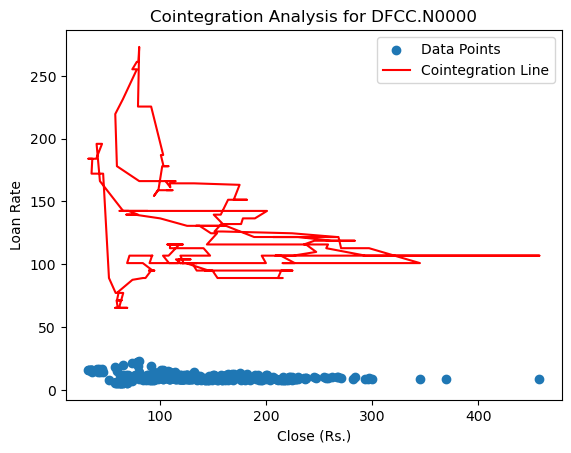

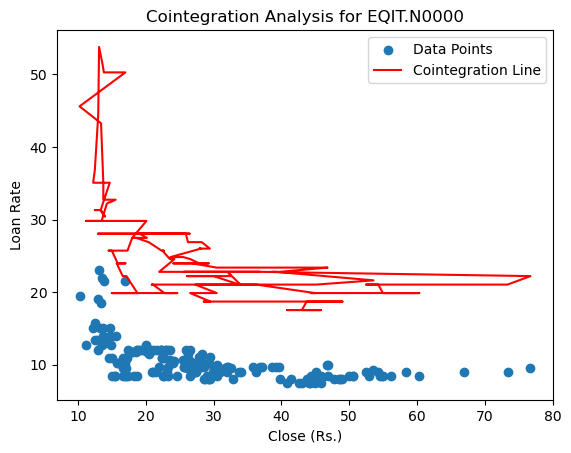

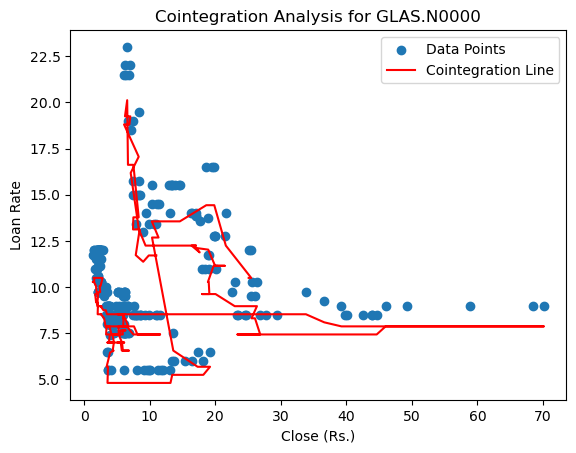

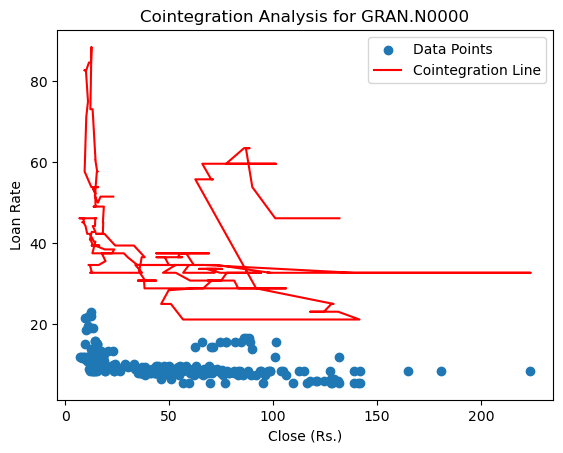

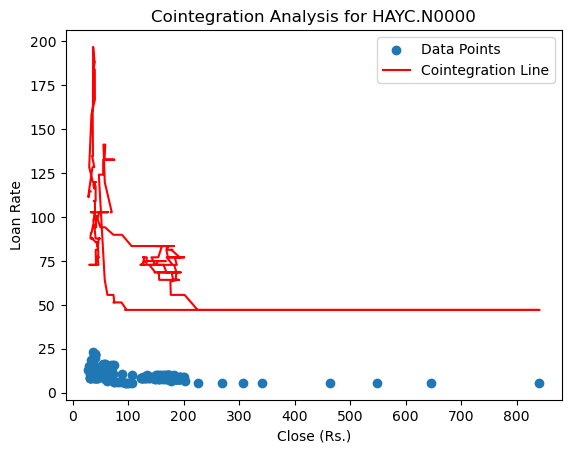

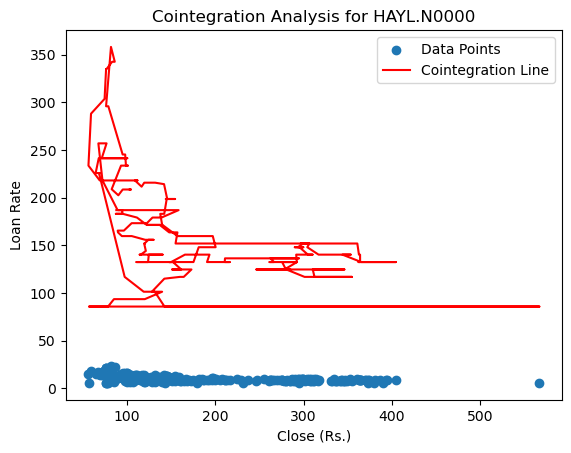

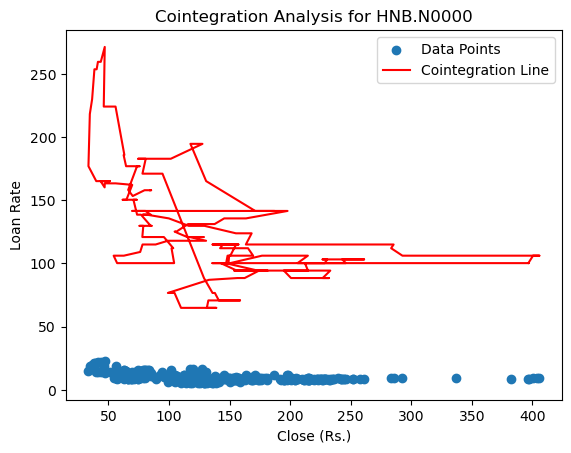

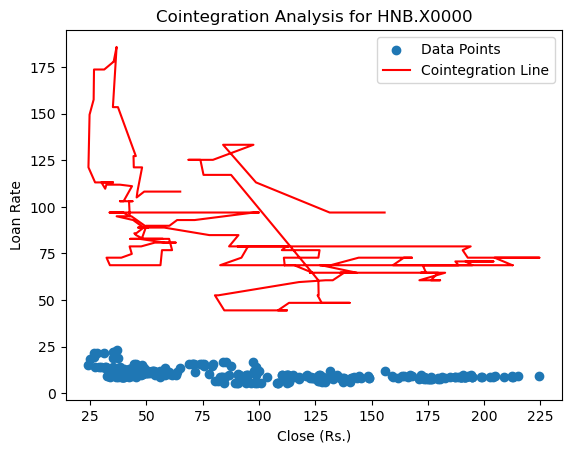

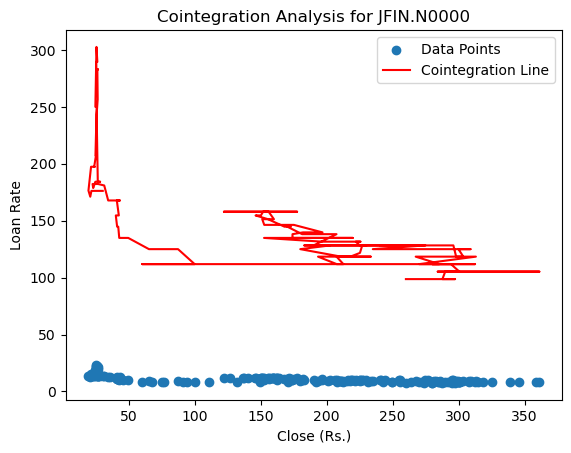

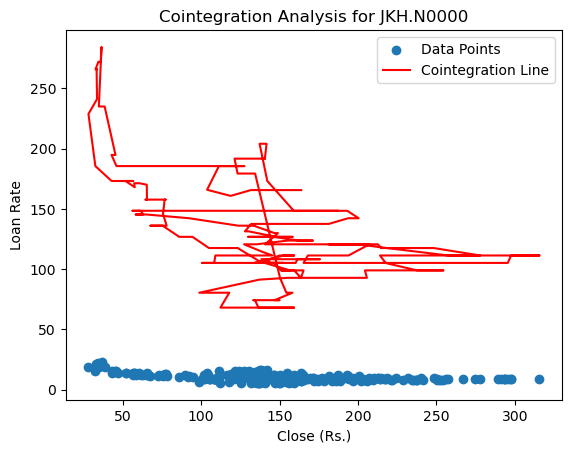

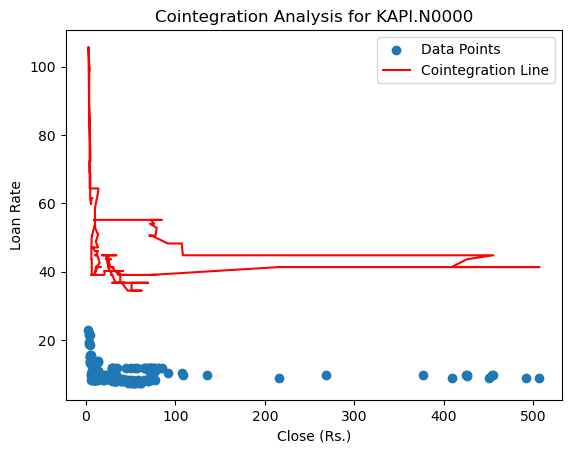

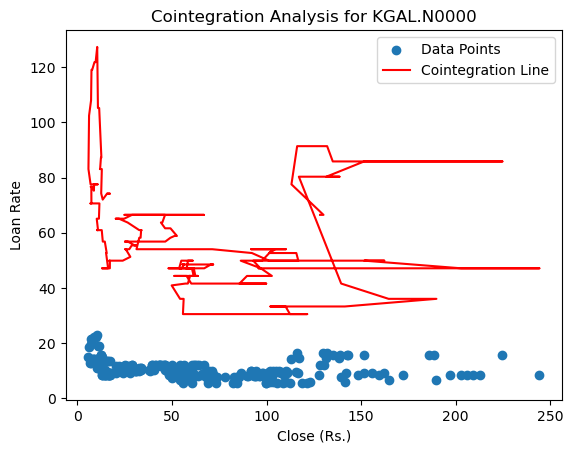

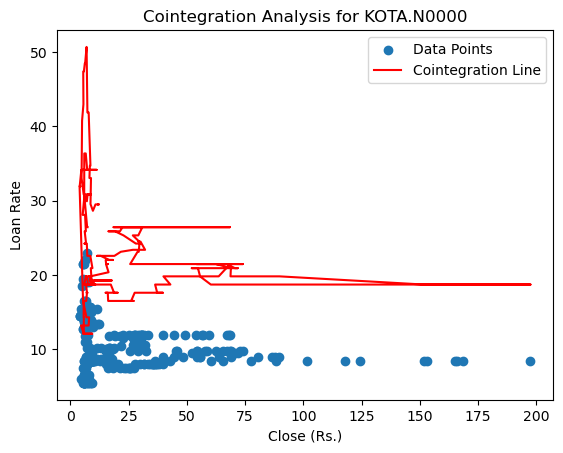

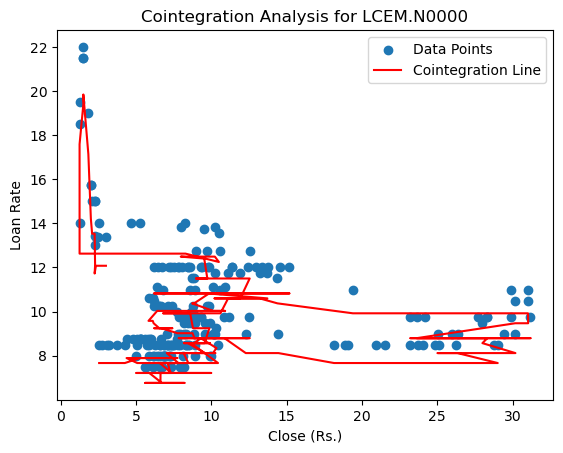

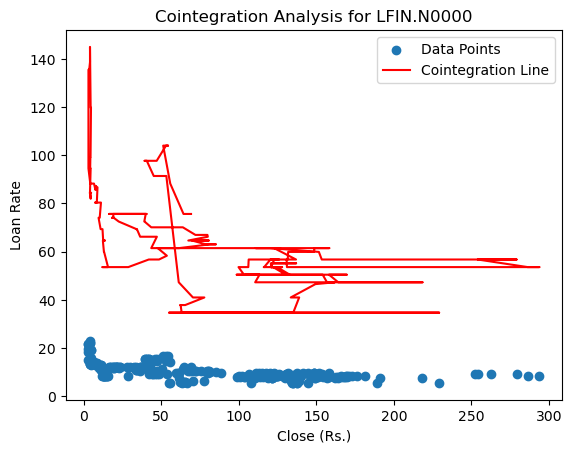

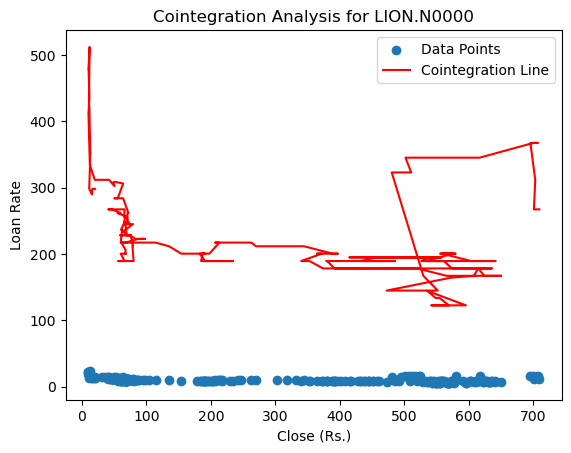

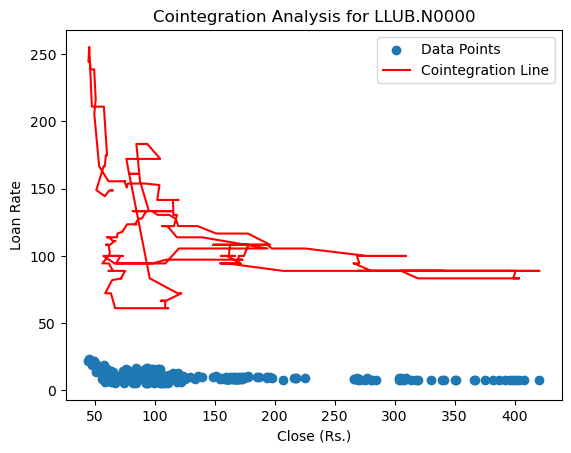

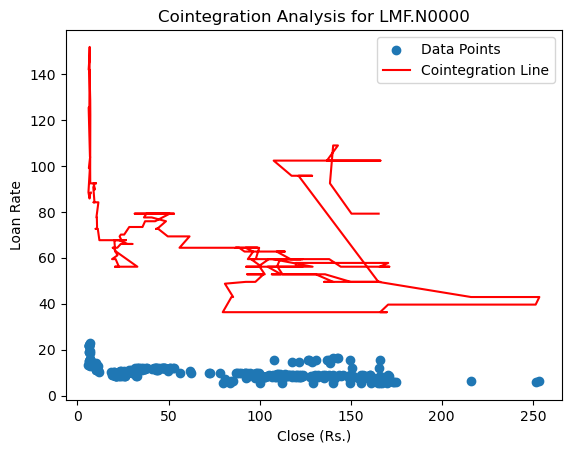

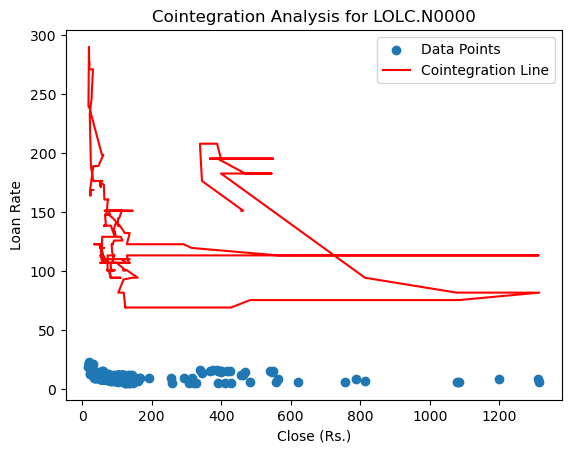

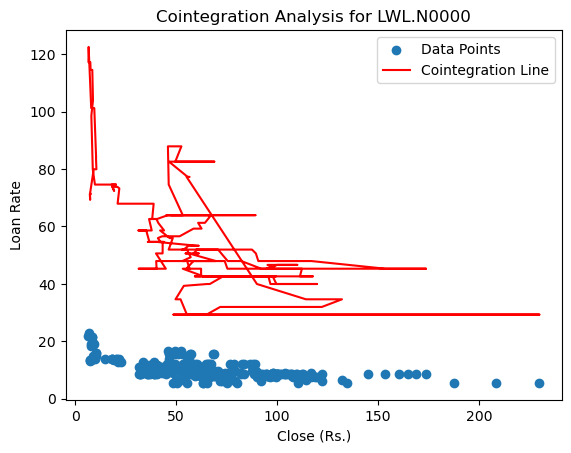

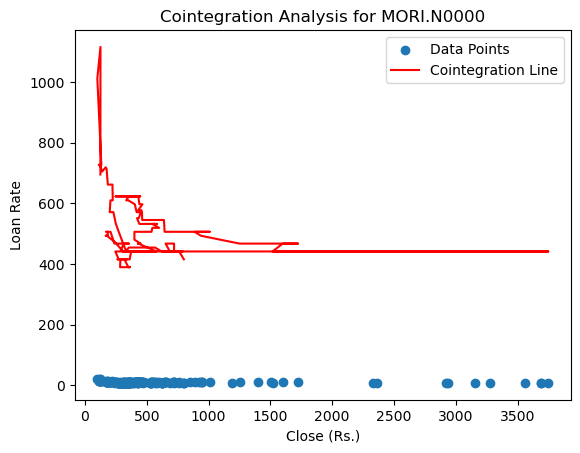

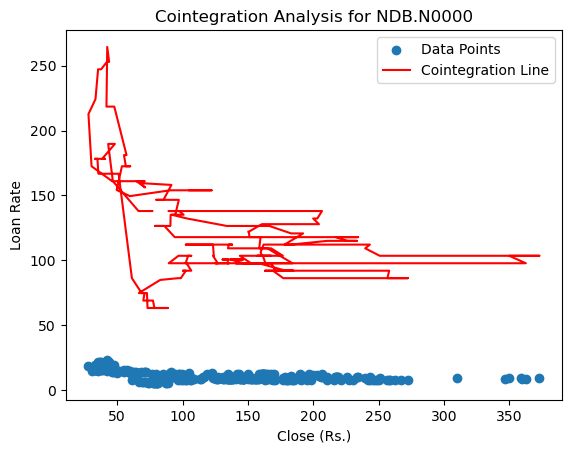

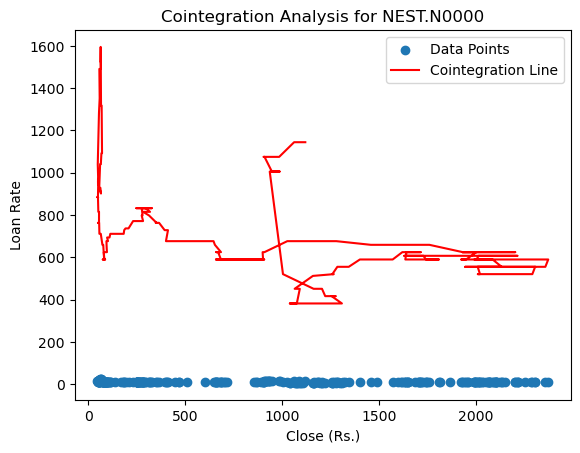

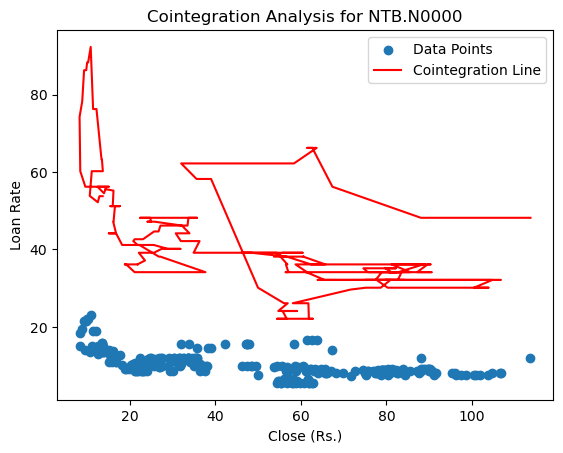

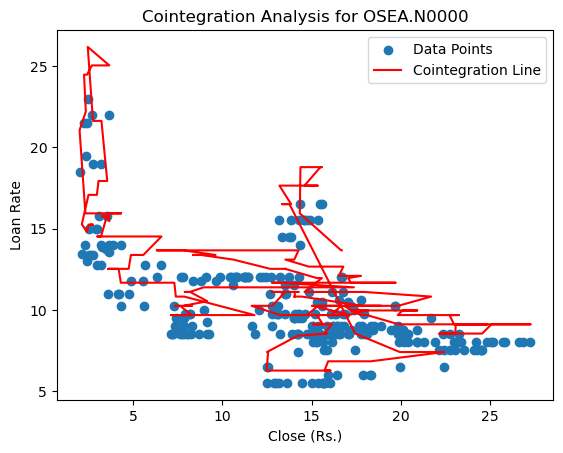

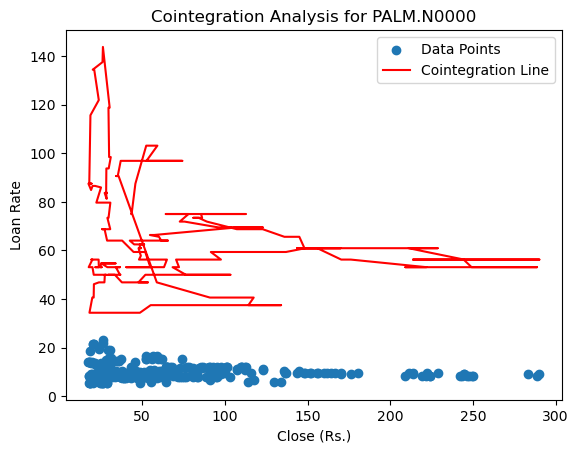

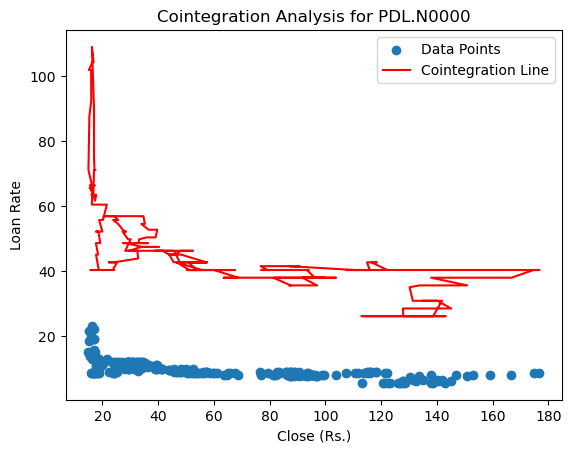

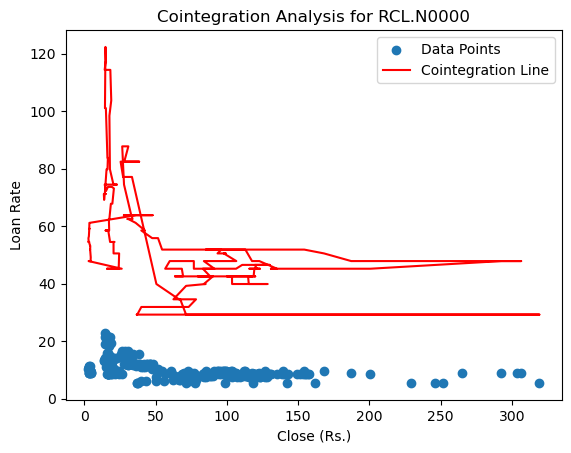

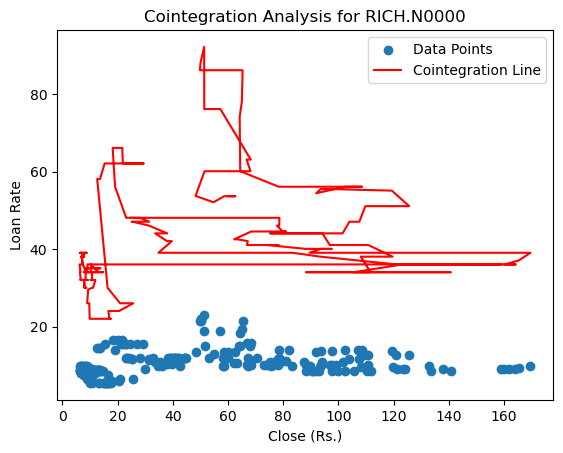

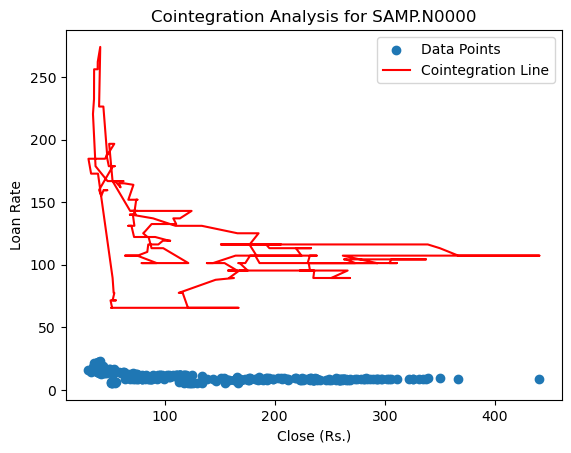

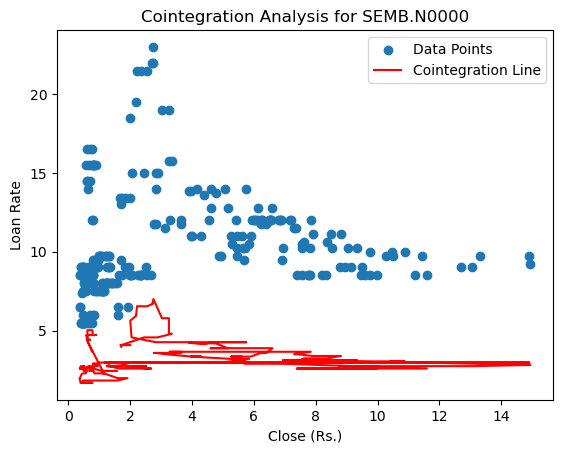

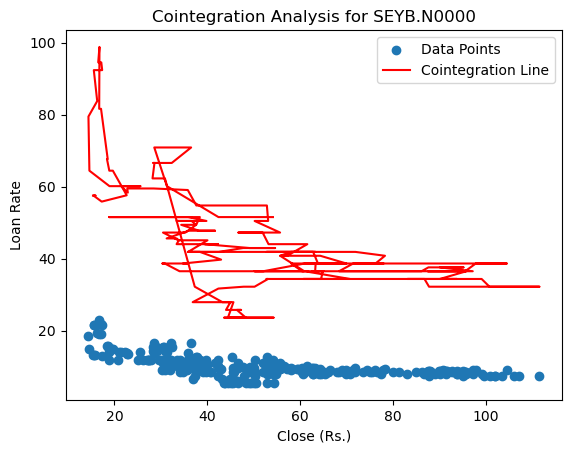

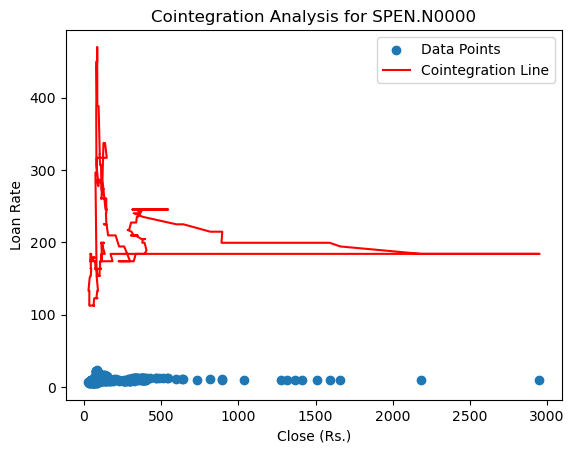

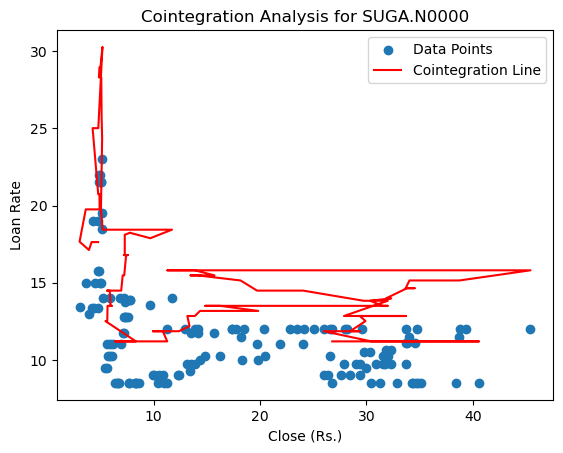

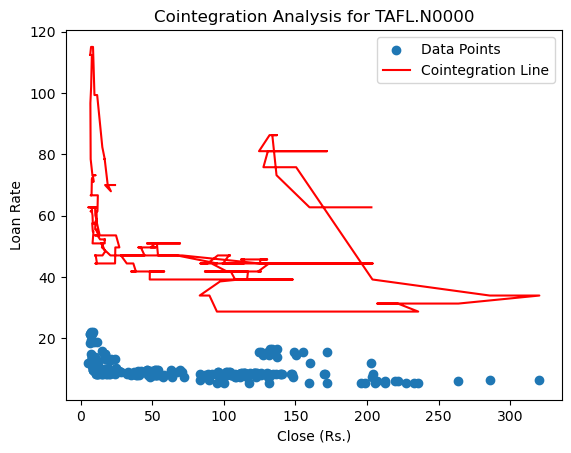

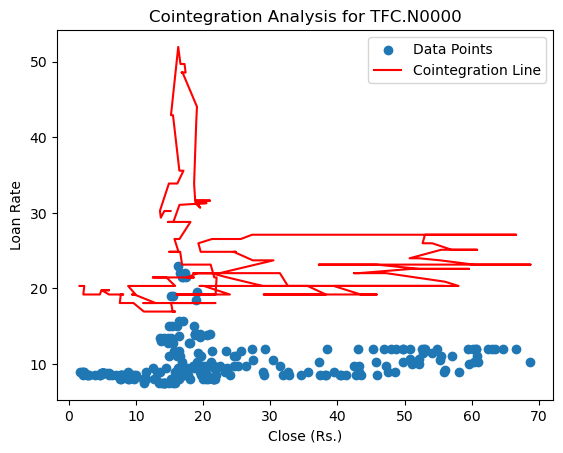

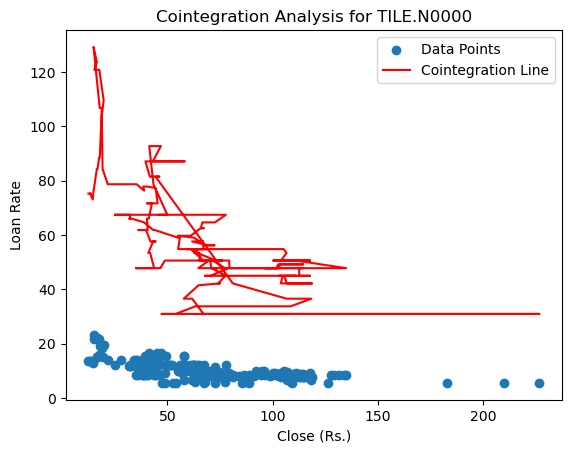

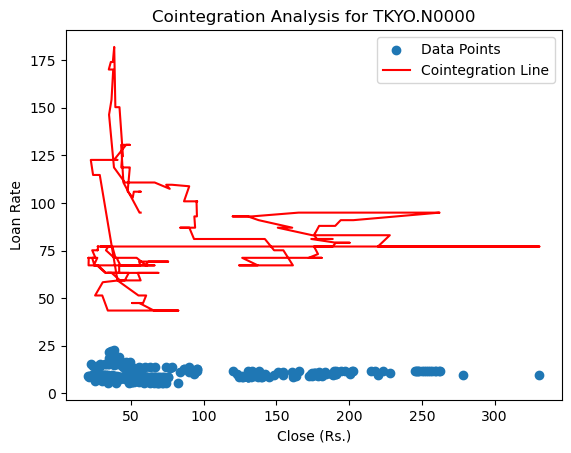

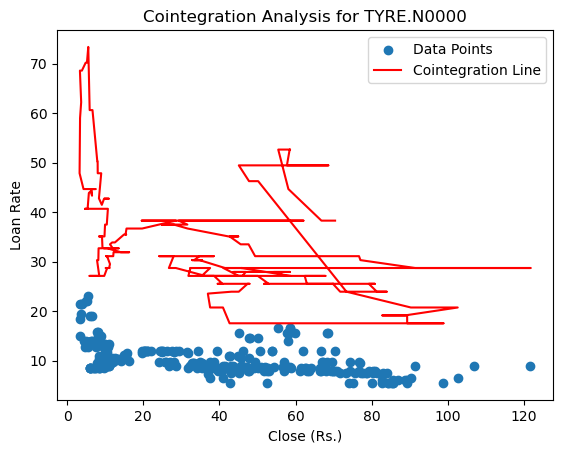

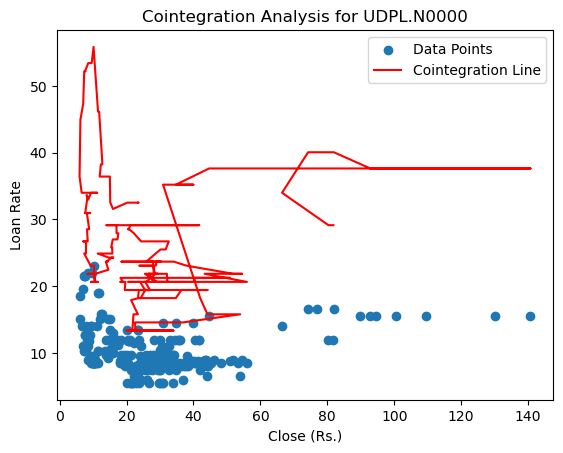

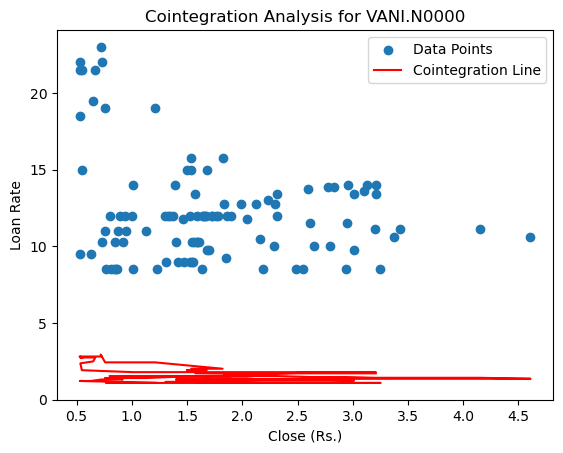

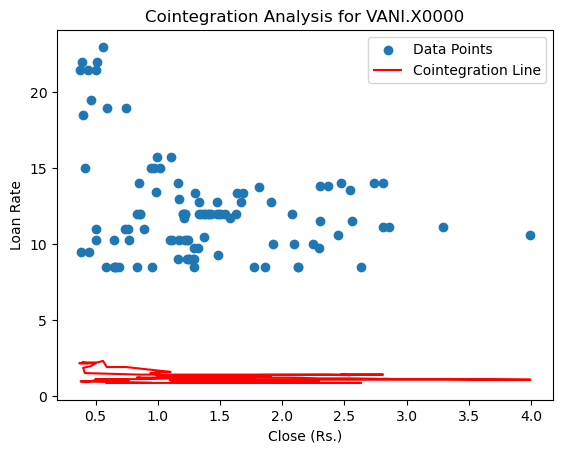

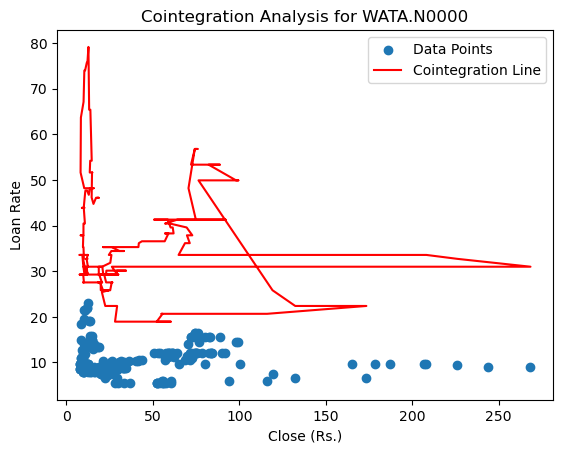

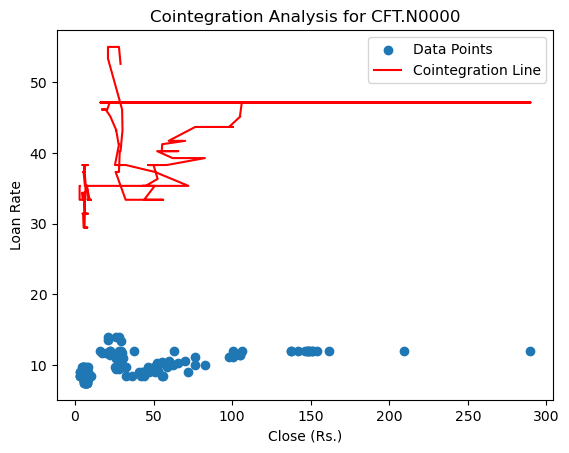

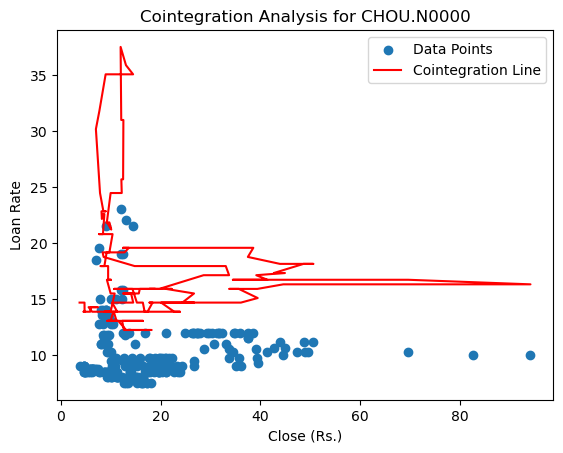

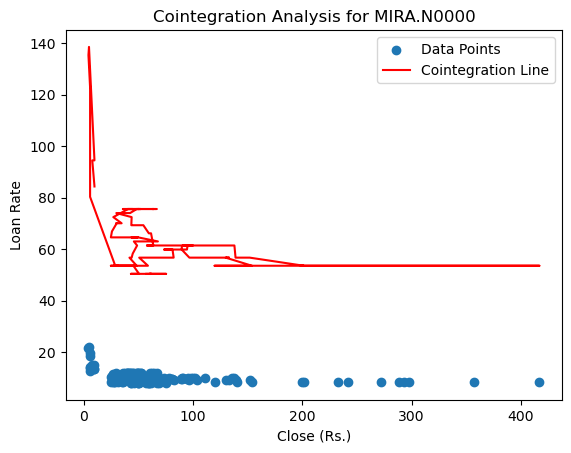

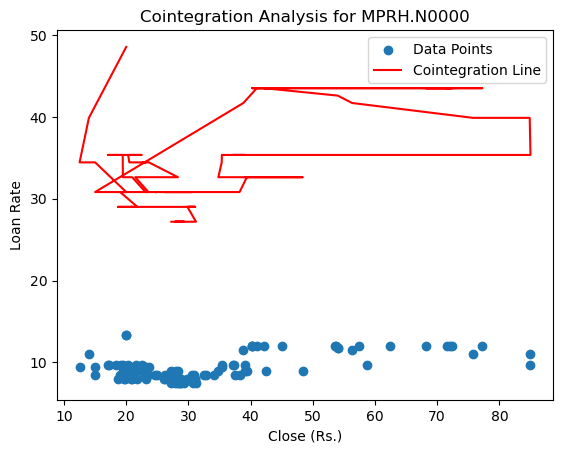

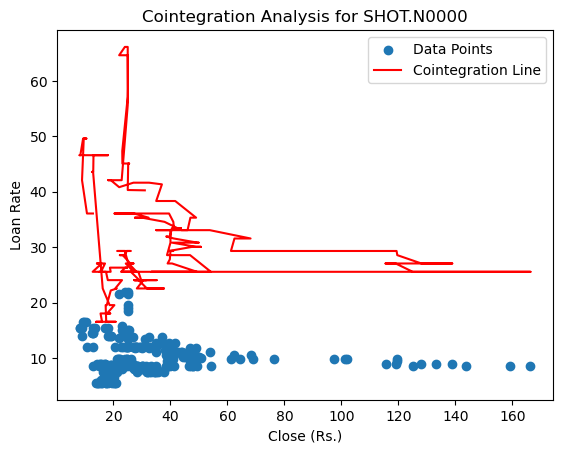

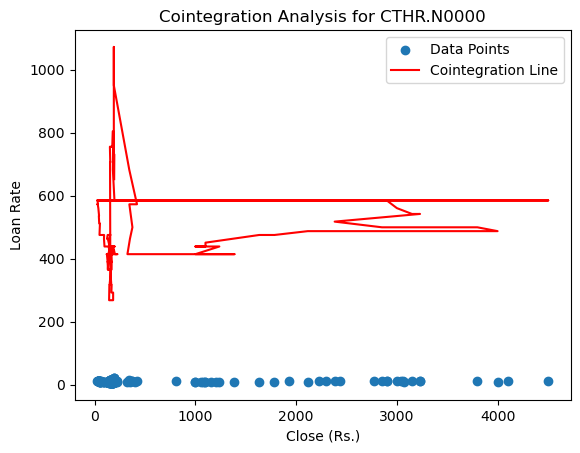

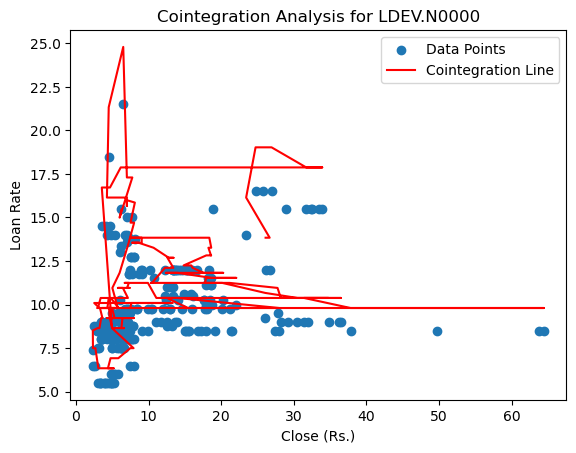

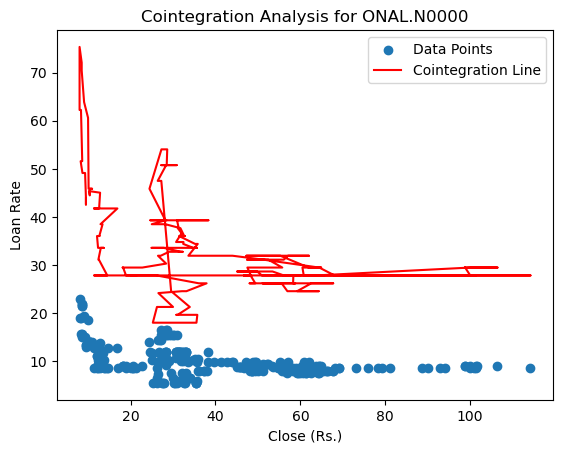

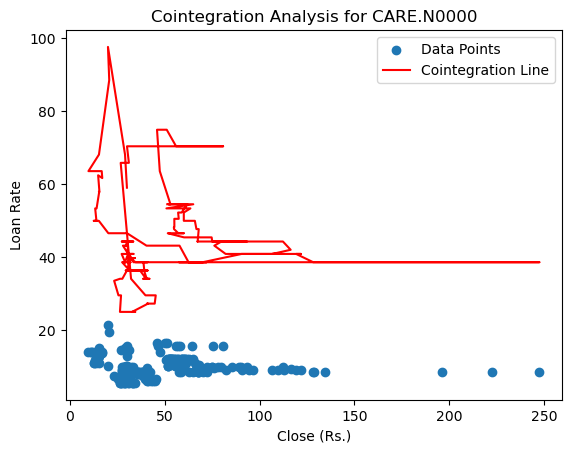

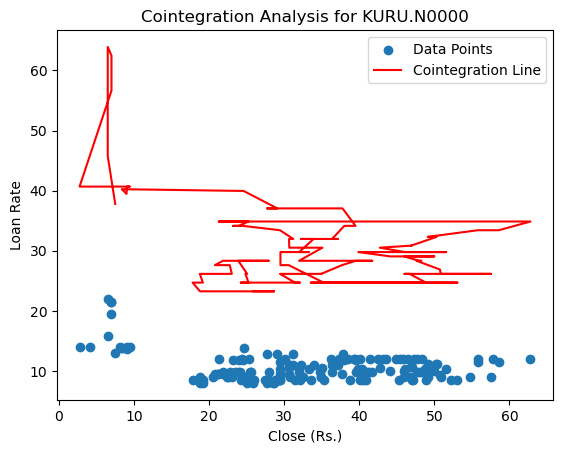

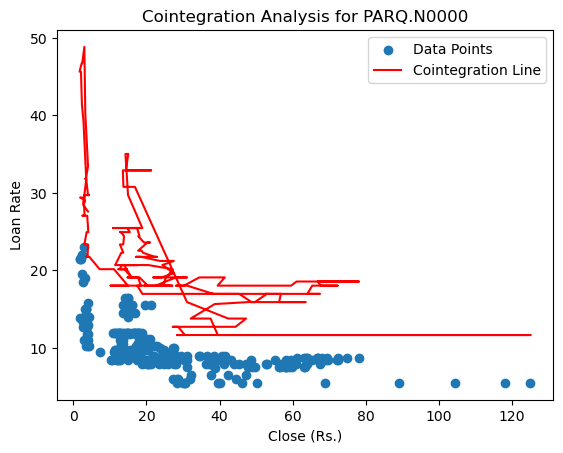

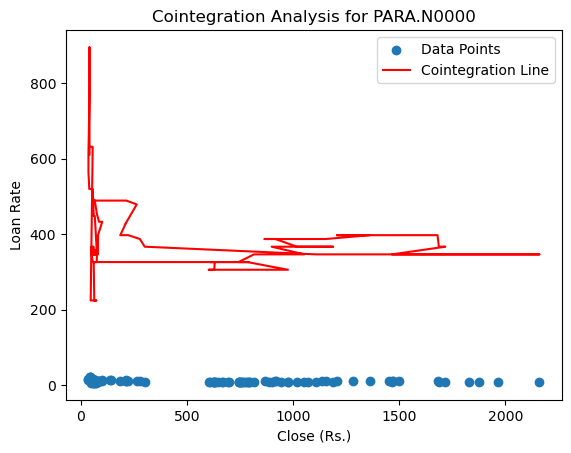

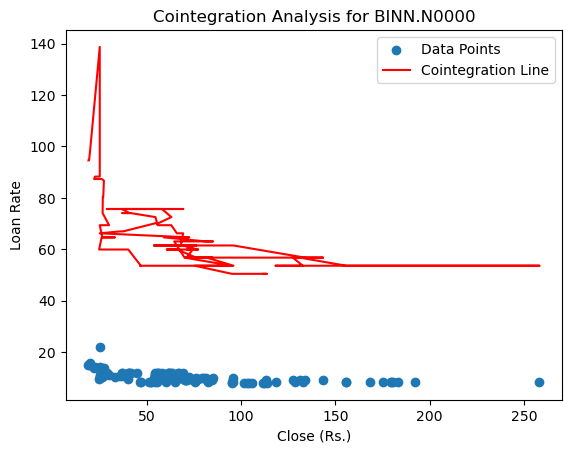

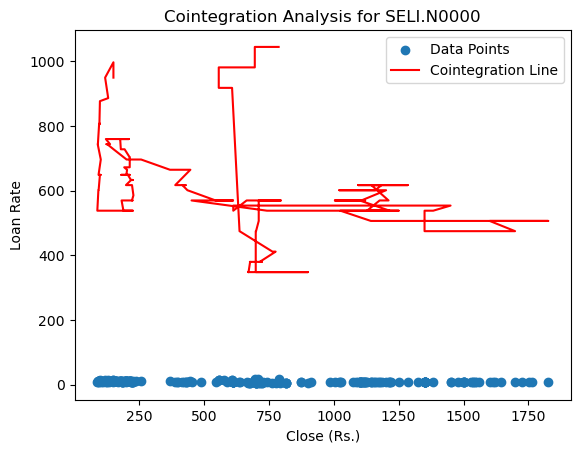

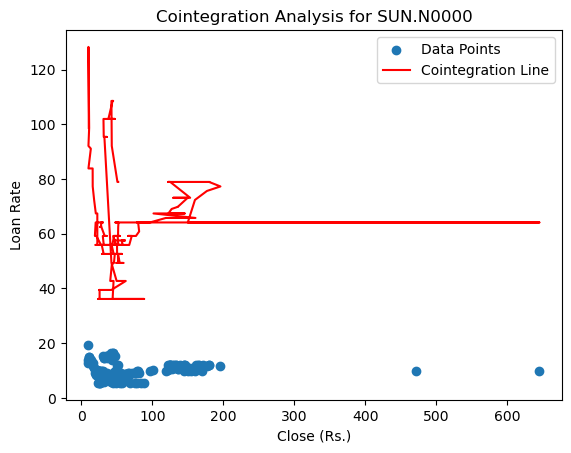

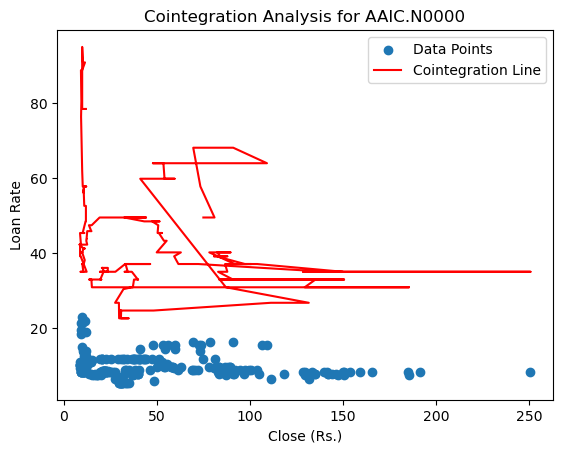

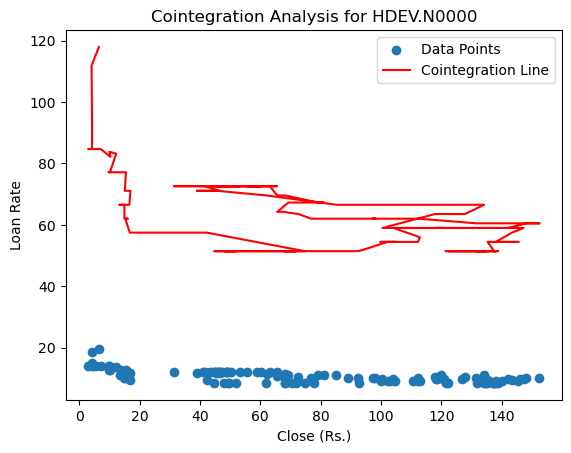

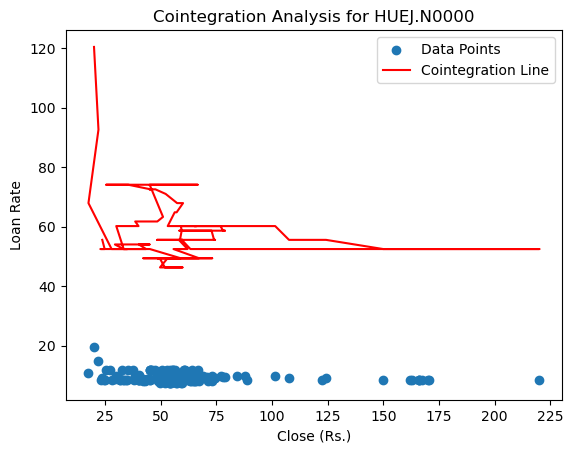

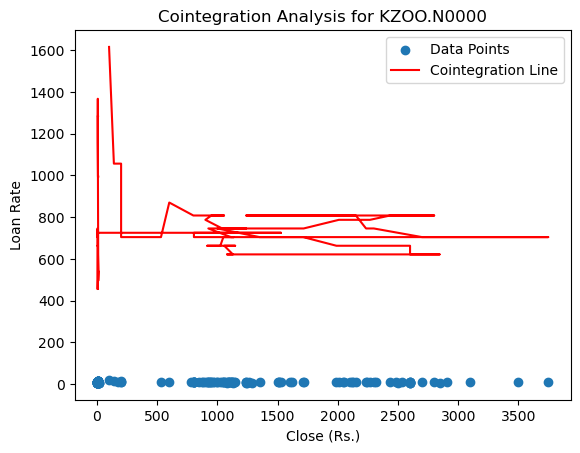

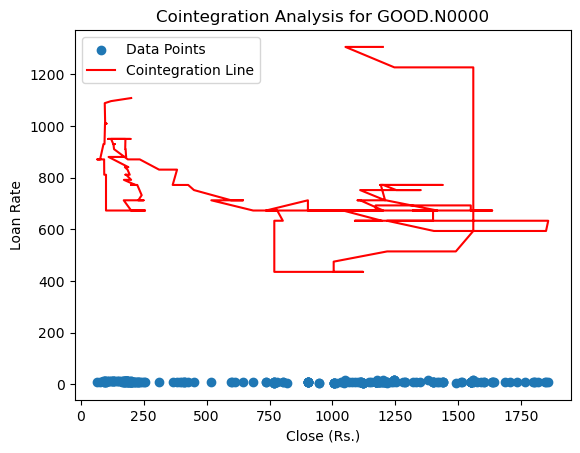

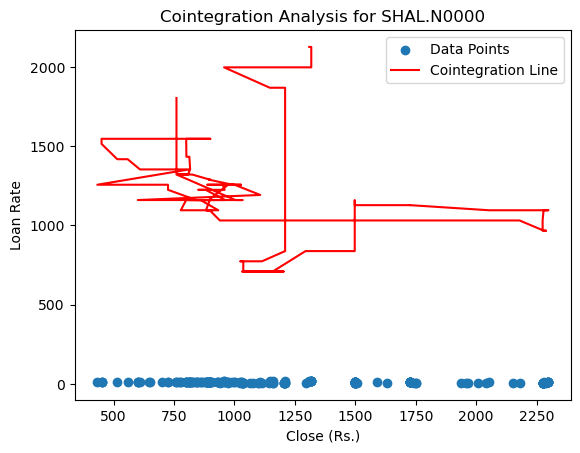

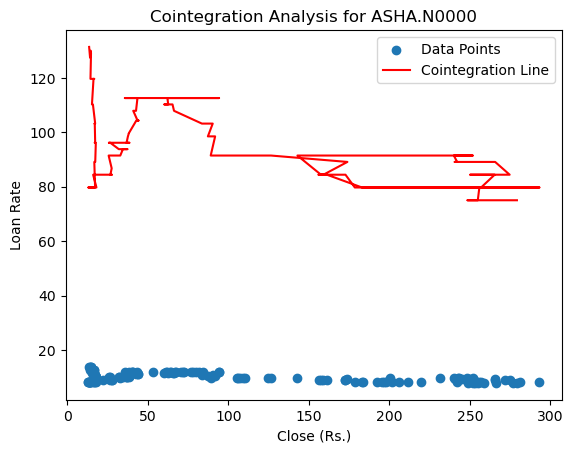

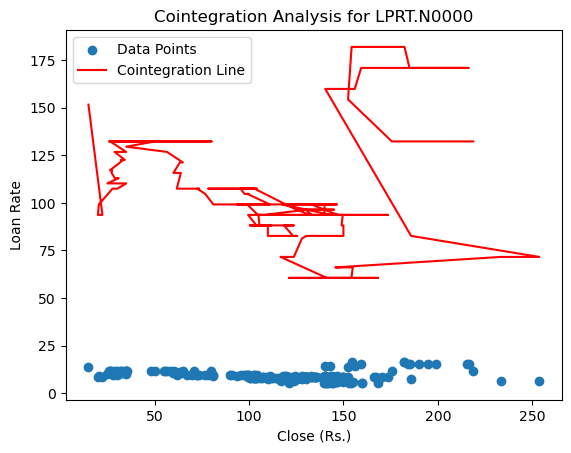

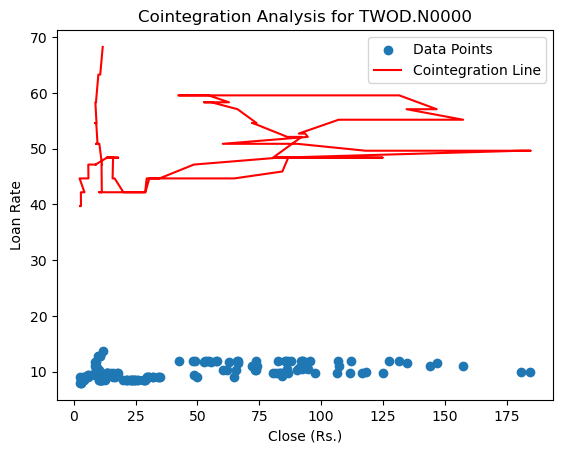

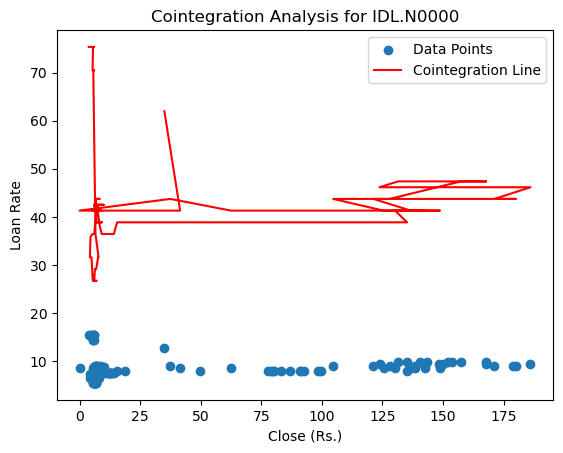

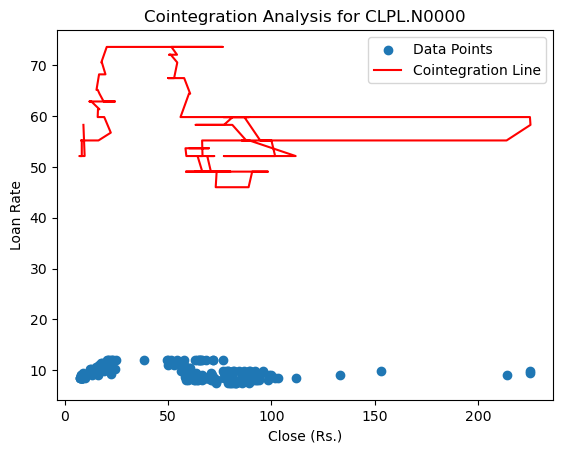

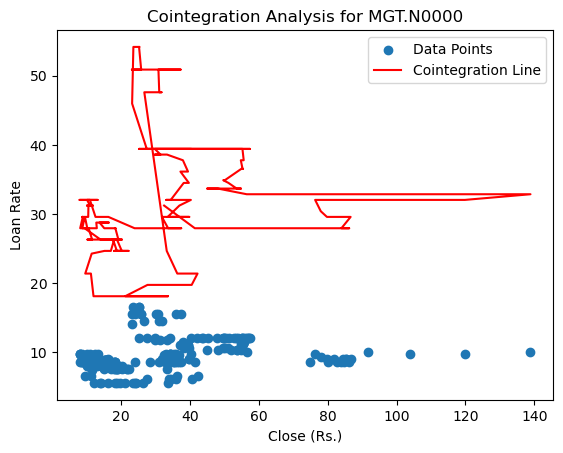

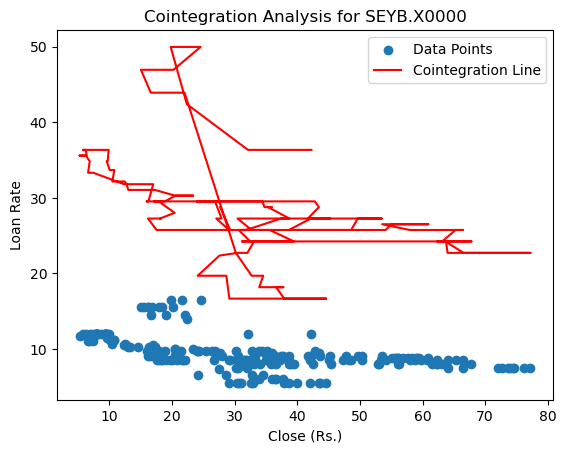

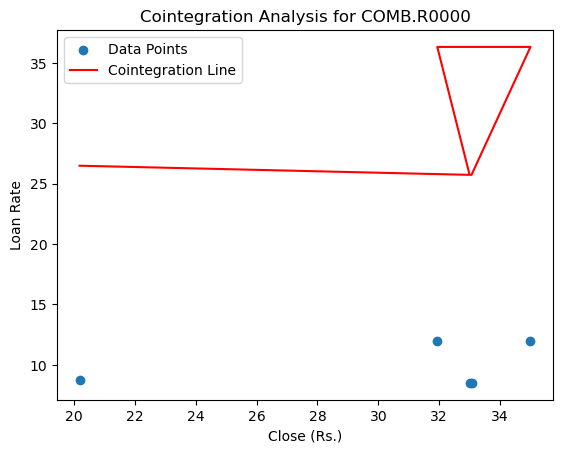

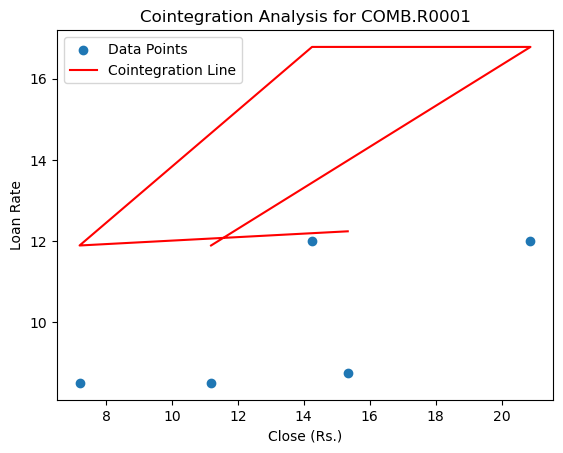

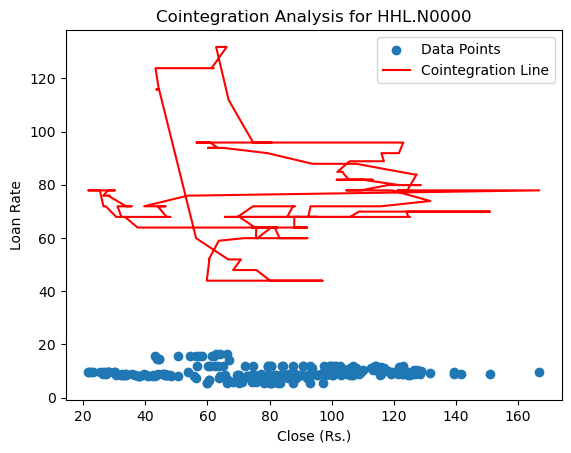

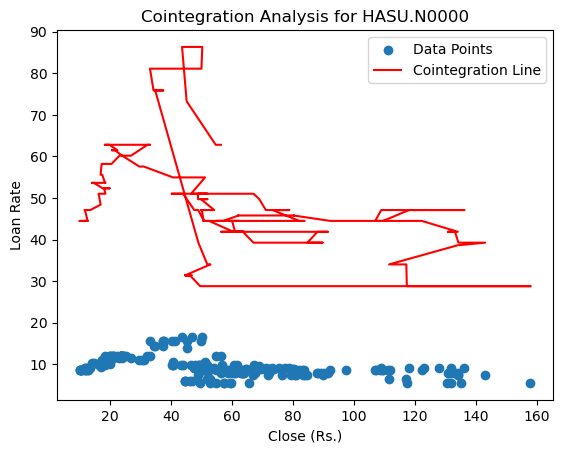

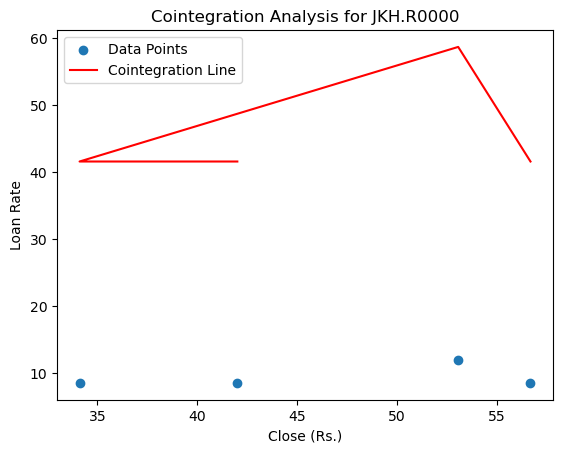

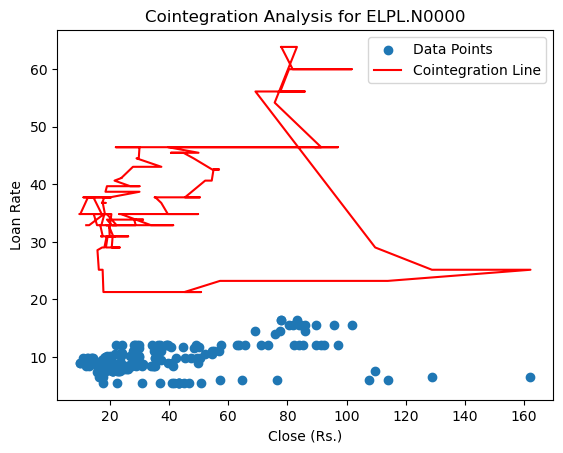

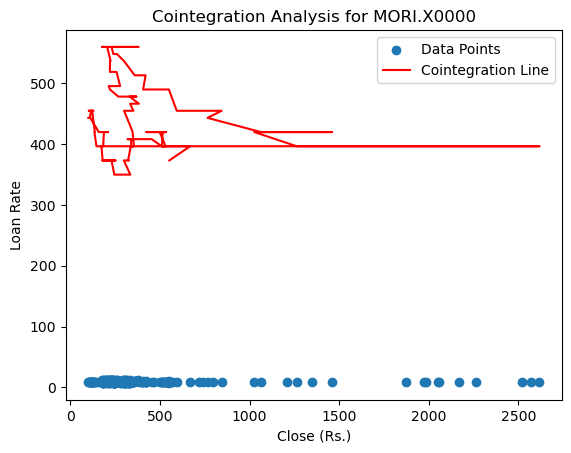

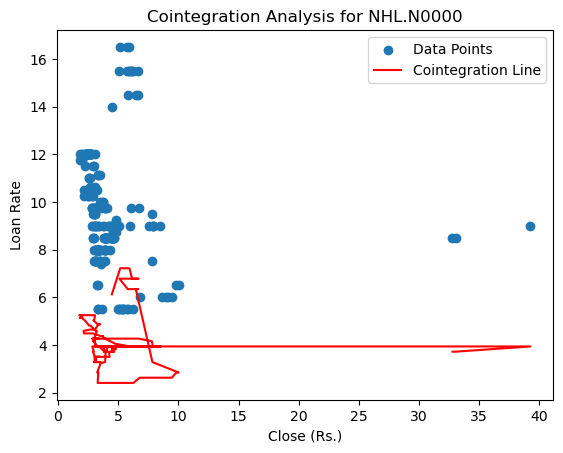

ValueError: sample size is too short to use selected regression component

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv("./final_loan_rate_vs_stock_values.csv")

# Get a list of unique stock labels
unique_stock_labels = df['Label'].unique()

# Create a dictionary to store the cointegration results for each stock
cointegration_results = {}

# Iterate through each stock label and perform cointegration analysis
for stock_label in unique_stock_labels:
    stock_data = df[df['Label'] == stock_label]
    
    # Perform cointegration analysis
    result = sm.OLS(stock_data['Close (Rs.)'], stock_data['Loan Rate']).fit()
    adf_test = sm.tsa.adfuller(result.resid)
    
    # Store the results in the dictionary
    cointegration_results[stock_label] = {
        'Cointegration': adf_test[1] < 0.05,
        'ADF Statistic': adf_test[0],
        'P-Value': adf_test[1]
    }

    # Optional: Plot the cointegration for each stock
    plt.scatter(stock_data['Close (Rs.)'], stock_data['Loan Rate'], label="Data Points")
    plt.plot(stock_data['Close (Rs.)'], result.predict(), color='red', label="Cointegration Line")
    plt.title(f'Cointegration Analysis for {stock_label}')
    plt.xlabel("Close (Rs.)")
    plt.ylabel("Loan Rate")
    plt.legend()
    plt.show()

# Print the cointegration results
for stock_label, result in cointegration_results.items():
    if result['Cointegration']:
        print(f"{stock_label}: Cointegration exists (P-Value: {result['P-Value']:.4f})")
    else:
        print(f"{stock_label}: No cointegration found (P-Value: {result['P-Value']:.4f})")

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the CSV data
df = pd.read_csv("./final_loan_rate_vs_stock_values.csv")

# Prepare the data
X = df[['Loan Rate']]  # Use 'Loan Rate' as the feature
y = df['Close (Rs.)']  # Predict 'Close (Rs.)'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 66920.58


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the CSV data
df = pd.read_csv("./final_loan_rate_vs_stock_values.csv")

# Prepare the data
X = df[['Loan Rate']].values  # Feature
y = df['Close (Rs.)'].values  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM Regression model
svm_model = SVR(kernel='linear')  # You can choose different kernel functions
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 72374.69


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the CSV data
df = pd.read_csv("./final_loan_rate_vs_stock_values.csv")

# Feature Engineering
# You can create new features or transform existing ones to improve the model.

# For example, you can try the following:
# 1. Polynomial features
df['Loan Rate Squared'] = df['Loan Rate'] ** 2

# Prepare the data
X = df[['Loan Rate', 'Loan Rate Squared']].values  # Include the new feature
y = df['Close (Rs.)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM Regression model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 72399.22


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset into a Pandas DataFrame
data = pd.read_csv("final_loan_rate_vs_stock_values.csv")

# Ensure that your data is in the right format
data['Close (Rs.)'] = pd.to_numeric(data['Close (Rs.)'], errors='coerce')
data['Loan Rate'] = pd.to_numeric(data['Loan Rate'], errors='coerce')

# Create a constant term to add to the regression model (for intercept)
data['intercept'] = 1

# Define the dependent (y) and independent (X) variables
X = data[['Loan Rate', 'intercept']]
y = data['Close (Rs.)']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the regression summary
summary = model.summary()

# Print the regression summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:            Close (Rs.)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     206.1
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.37e-46
Time:                        23:18:41   Log-Likelihood:            -2.3583e+05
No. Observations:               33796   AIC:                         4.717e+05
Df Residuals:                   33794   BIC:                         4.717e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Loan Rate     -7.0246      0.489    -14.355      0.0

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset into a Pandas DataFrame
data = pd.read_csv("./final_loan_rate_vs_stock_values.csv")

# Ensure that your data is in the right format
data['Close (Rs.)'] = pd.to_numeric(data['Close (Rs.)'], errors='coerce')
data['Loan Rate'] = pd.to_numeric(data['Loan Rate'], errors='coerce')

# Calculate the correlation between "Close (Rs.)" and "Loan Rate"
correlation = data['Close (Rs.)'].corr(data['Loan Rate'])

# Print the correlation coefficient
print(f"Correlation between 'Close (Rs.)' and 'Loan Rate': {correlation:.2f}")

Correlation between 'Close (Rs.)' and 'Loan Rate': -0.08
